In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class HierarchicalClustering:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        self.clusters = []

    def fit(self, X):
        self.clusters = [[point] for point in X]

        while len(self.clusters) > self.n_clusters:
            min_dist = float('inf')
            merge_clusters = None

            for i in range(len(self.clusters)):
                for j in range(i + 1, len(self.clusters)):
                    dist = self.distance(self.clusters[i], self.clusters[j])
                    if dist < min_dist:
                        min_dist = dist
                        merge_clusters = (i, j)

            i, j = merge_clusters
            self.clusters[i] += self.clusters[j]
            self.clusters.pop(j)

        return self.clusters

    def distance(self, cluster1, cluster2):
        centroid1 = np.mean(cluster1, axis=0)
        centroid2 = np.mean(cluster2, axis=0)
        return np.linalg.norm(centroid1 - centroid2)

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pd.read_csv(url, names=names)

X = data.iloc[:, :4].values
n_clusters = 3

In [4]:
hc = HierarchicalClustering(n_clusters)
clusters = hc.fit(X)

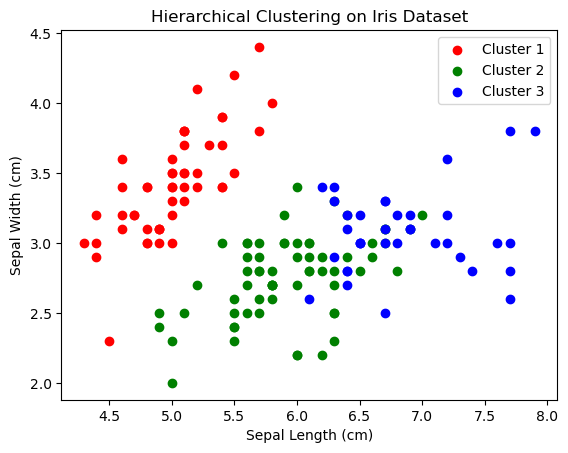

In [5]:
colors = ['r', 'g', 'b', 'c', 'm', 'y']
for i, cluster in enumerate(clusters):
    cluster_points = np.array(cluster)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i+1}')

plt.title('Hierarchical Clustering on Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()